In [0]:
import pandas as pd
import tensorflow as tf
import tensorflow.compat.v1 as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
tf.disable_v2_behavior()

In [0]:
base = pd.read_csv('/content/drive/My Drive/TensorFlow_1.x_guide/classification/CSV/census.csv')

In [0]:
base.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
def convert_class(tally):
  if tally == ' >50K':
    return 1
  else:
    return 0

In [0]:
base['income'] = base['income'].apply(convert_class)

In [0]:
base['income'].unique()

array([0, 1])

In [0]:
X = base.drop('income', axis=1)

In [0]:
X.head

<bound method NDFrame.head of        age          workclass  ...  hour-per-week  native-country
0       39          State-gov  ...             40   United-States
1       50   Self-emp-not-inc  ...             13   United-States
2       38            Private  ...             40   United-States
3       53            Private  ...             40   United-States
4       28            Private  ...             40            Cuba
...    ...                ...  ...            ...             ...
32556   27            Private  ...             38   United-States
32557   40            Private  ...             40   United-States
32558   58            Private  ...             40   United-States
32559   22            Private  ...             20   United-States
32560   52       Self-emp-inc  ...             40   United-States

[32561 rows x 14 columns]>

In [0]:
y = base['income']

In [0]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

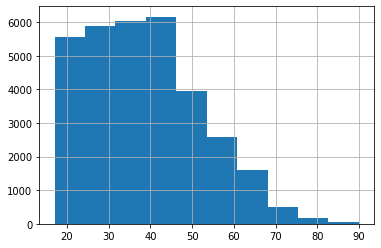

In [0]:
base.age.hist()

In [0]:
age = tf.feature_column.numeric_column('age')

In [0]:
category_age = [tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80,90])]

In [0]:
print(category_age)

[BucketizedColumn(source_column=NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80, 90))]


In [0]:
X.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'],
      dtype='object')

In [0]:
name_categorical_columns = ['workclass', 'education','marital-status', 'occupation', 
                            'relationship', 'race', 'sex', 'native-country']

In [0]:
categorical_columns = [tf.feature_column.sequence_categorical_column_with_vocabulary_list(key = c, vocabulary_list=X[c].unique()) for c in name_categorical_columns]

In [0]:
print(categorical_columns[0])

SequenceCategoricalColumn(categorical_column=VocabularyListCategoricalColumn(key='workclass', vocabulary_list=(' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked'), dtype=tf.string, default_value=-1, num_oov_buckets=0))


In [0]:
name_numeric_columns = ['final-weight', 'education-num', 'capital-gain', 'capital-loos', 'hour-per-week']

In [0]:
columns_numeric = [tf.feature_column.numeric_column(key=c) for c in name_numeric_columns]

In [0]:
print(columns_numeric[0])

NumericColumn(key='final-weight', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)


In [0]:
columns = category_age + columns_numeric + categorical_columns

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [0]:
function_train = tf.estimator.inputs.pandas_input_fn(x= X_train, y= y_train, batch_size=32, num_epochs=None, shuffle=True)

In [0]:
classifier = tf.estimator.LinearClassifier(feature_columns=columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpinx_54sh', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
classifier.train(input_fn=function_train, steps=10000)

In [0]:
function_prevision = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=32, shuffle=False)

In [0]:
prevision  = classifier.predict(input_fn=function_prevision)

In [0]:
list(prevision)

In [0]:
prevision_finaly = []
for p in classifier.predict(input_fn=function_prevision):
  prevision_finaly.append(p['class_ids'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpinx_54sh/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [0]:
prevision_finaly

In [0]:
accuracy_score = accuracy_score(y_test, prevision_finaly)

In [0]:
accuracy_score

0.4350496468420514